In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

* 1000 for training
* 200 for validation
* 100 for test

Each of the set will split evenly between cats and dogs

In [2]:
# #Create directories
# os.chdir('data/dogs-vs-cats')
# if os.path.isdir('train/dog') is False:
#     os.makedirs('train/dog')
#     os.makedirs('train/cat')
#     os.makedirs('valid/dog')
#     os.makedirs('valid/cat')
#     os.makedirs('test/dog')
#     os.makedirs('test/cat')      

In [4]:
# #organize data into train, valid, test dirs
# for c in random.sample(glob.glob('cat*'), 5000):
#     shutil.move(c, 'train/cat')
# for c in random.sample(glob.glob('dog*'), 5000):
#     shutil.move(c, 'train/dog')
# for c in random.sample(glob.glob('dog*'), 900):
#     shutil.move(c, 'valid/dog')
# for c in random.sample(glob.glob('dog*'), 900):
#     shutil.move(c, 'valid/cat')
# for c in random.sample(glob.glob('dog*'), 400):
#     shutil.move(c, 'test/dog')
# for c in random.sample(glob.glob('cat*'), 400):
#     shutil.move(c, 'test/cat')

In [5]:
train_path = 'data/dogs-vs-cats/train'
valid_path = 'data/dogs-vs-cats/valid'
test_path = 'data/dogs-vs-cats/test'

In [6]:
base_dir = './data/dogs-vs-cats/'

In [7]:
os.chdir('/home/ki/myprojects/TF-coursera/course1/')

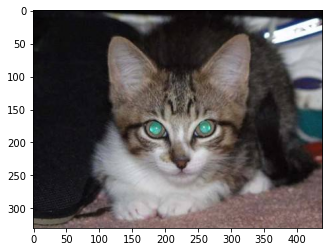

In [8]:
cat_sample = plt.imread(os.path.join(train_path, 'cat', os.listdir(train_path+'/cat')[0]))
plt.imshow(cat_sample)

### Callback

In [9]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.97:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

### Pre-processing with ImageDataGenerator

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# GRADED FUNCTION: image_generator
def image_generator():
    ### START CODE HERE
    
    # Instantiate the ImageDataGenerator class.
    # Remember to set the rescale argument.
    train_datagen = ImageDataGenerator(rescale=1/255)

    # Specify the method to load images from a directory and pass in the appropriate arguments:
    # - directory: should be a relative path to the directory containing the data
    # - targe_size: set this equal to the resolution of each image (excluding the color dimension)
    # - batch_size: number of images the generator yields when asked for a next batch. Set this to 10.
    # - class_mode: How the labels are represented. Should be one of "binary", "categorical" or "sparse".
    #               Pick the one that better suits here given that the labels are going to be 1D binary labels.
    train_generator = train_datagen.flow_from_directory(directory=base_dir,
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')
    ### END CODE HERE

    return train_generator

In [2]:
gen = image_generator()

NameError: name 'base_dir' is not defined

In [20]:
from tensorflow.keras import optimizers, losses
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

# GRADED FUNCTION: train_happy_sad_model
def train_happy_sad_model(train_generator):

    # Instantiate the callback
    callbacks = myCallback()

    ### START CODE HERE

#     # Define the model
#     model = tf.keras.models.Sequential([
#         tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150,3)),
#         tf.keras.layers.MaxPool2D(2,2),
#         tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#         tf.keras.layers.MaxPool2D(2,2),
#         tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#         tf.keras.layers.MaxPool2D(2,2),
        
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(512, activation='relu'),
#         tf.keras.layers.Dense(1, activation='sigmoid')
#     ])
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', 
                     input_shape=(150, 150, 3)))
    # 32 here means this layer will contain 32 filters of size 3x3 being learnt
    model.add(BatchNormalization())
    # batchnorm is a useful layer that helps in convergence
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # maxpooling will reduce the size of the image
    model.add(Dropout(0.25))
    # dropout is used for regularization, ensuring that model doesn't overfit

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # convolutional block is complete. now on to defining the "head"

    # first flatten the matrix to get a single array
    model.add(Flatten())
    # adding a dense hidden layer of neurons
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    # finally the output layer with neurons=number of classes and softmax activation
    model.add(Dense(1, activation='sigmoid')) # 2 because we have cat and dog classes

    

    # Compile the model
    # Select a loss function compatible with the last layer of your network
    model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                  metrics=['accuracy']) 
    


    # Train the model
    # Your model should achieve the desired accuracy in less than 15 epochs.
    # You can hardcode up to 20 epochs in the function below but the callback should trigger before 15.
    history = model.fit(x=train_generator,
                        epochs=15,
                        callbacks=[callbacks]
                       ) 
    
    ### END CODE HERE
    return history

In [21]:
hist = train_happy_sad_model(gen)

Epoch 1/15
1260/1260 [==============================] - 10s 8ms/step - loss: -2.3738 - accuracy: 0.7544
Epoch 2/15
1260/1260 [==============================] - 10s 8ms/step - loss: -18.9420 - accuracy: 0.7879
Epoch 3/15
1260/1260 [==============================] - 10s 8ms/step - loss: -53.8127 - accuracy: 0.7927
Epoch 4/15
1260/1260 [==============================] - 10s 8ms/step - loss: -112.0975 - accuracy: 0.7934
Epoch 5/15
1260/1260 [==============================] - 9s 7ms/step - loss: -198.6052 - accuracy: 0.7934
Epoch 6/15
1260/1260 [==============================] - 10s 8ms/step - loss: -297.6064 - accuracy: 0.7935
Epoch 7/15
1260/1260 [==============================] - 10s 8ms/step - loss: -420.6090 - accuracy: 0.7936
Epoch 8/15
1260/1260 [==============================] - 10s 8ms/step - loss: -582.8082 - accuracy: 0.7936
Epoch 9/15
1260/1260 [==============================] - 10s 8ms/step - loss: -757.2833 - accuracy: 0.7934
Epoch 10/15
1260/1260 [============================